In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
plt.style.use('default')

In [4]:
df = pd.read_csv("C:/Users/admin/Documents/DAV 2024/Datasets/ChessGamesDataset.csv")
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

** 0   game_id            :this is game id
 
 1   rated              :if the game is rated the rating of players will be affected on winning and loosing  
 
 2   turns              : it is total no. of moves played by both player 
 
 3   victory_status     :resign , mate,draw are victory state
 
 4   winner             : who won white or black
 
 5   time_increment     :the time control of the respective game
 
 6   white_id           :the id of of white opponent
 
 7   white_rating       :the rating of of white opponent
 
 8   black_id           :the id of of black opponent
 
 9   black_rating       :the rating of of white opponent 
 
 10  moves              :the chess notation of the game bwtween both players
 
 11  opening_code       :i dont know
 
 12  opening_moves      :this might be the no. of moves to complete the the   
 
 13  opening_fullname   : name of the opening
 
 14  opening_shortname  :short name of opening
 
 15  opening_variation   : What is opening variation in chess?
                          A variation is a major departure in play in an opening, it often has a separate name. It is often early in the opening moves                               made**

In [5]:
df.isna().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation     5660
dtype: int64

**EDA**

**who has won the most game white or black**

In [6]:
df.groupby('winner').agg({'winner':'count'})

,winner
winner,
Black,9107
Draw,950
White,10001


In [7]:
%matplotlib inline

**Statistics of winning by white & black pieces**

<Axes: xlabel='winner'>

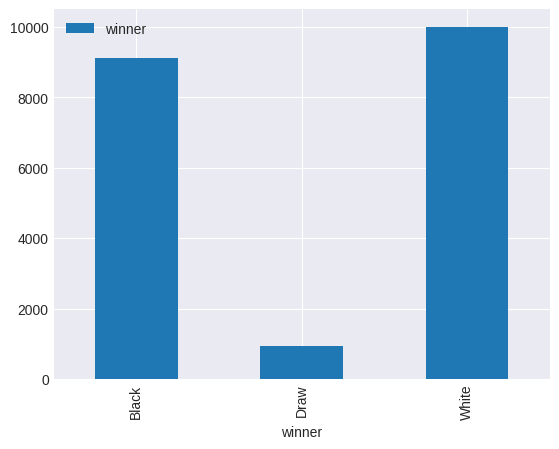

In [8]:
df.groupby(['winner']).agg({'winner':'count'}).plot(kind = 'bar')

**which time format are played most?**

In [9]:

df.groupby(['time_increment'])['time_increment'].count().sort_values(ascending=False)

time_increment
10+0     7721
15+0     1311
15+15     850
5+5       738
5+8       697
         ... 
17+13       1
30+7        1
30+60       1
17+16       1
90+8        1
Name: time_increment, Length: 400, dtype: int64

**how many unique opening exist?**

In [10]:
df['opening_shortname'].unique()

array(['Slav Defense', 'Nimzowitsch Defense', "King's Pawn Game",
       "Queen's Pawn Game", 'Philidor Defense', 'Sicilian Defense',
       'Blackmar-Diemer Gambit', 'Italian Game', 'Scandinavian Defense',
       "Van't Kruijs Opening", 'French Defense', 'Four Knights Game',
       'Horwitz Defense', 'English Opening', 'Scotch Game',
       "Queen's Gambit", 'Robatsch (Modern) Defense', 'Indian Game',
       'Dutch Defense', 'Zukertort Opening', 'Vienna Game',
       'Modern Defense', 'Blumenfeld Countergambit', "Queen's Pawn",
       'Crab Opening', "Queen's Indian Defense", 'Gruenfeld Defense',
       'Yusupov-Rubinstein System', 'Ruy Lopez', "Bishop's Opening",
       'Benoni Defense', "King's Indian Attack", 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', "King's Knight Opening", 'Amar Opening',
       'Paleface Attack', 'Hungarian Opening', 'Center Game',
       'Englund Gambit', 'Giuoco Piano', "Petrov's 

**Top 10 opening played by most player**

Text(0, 0.5, 'opening name')

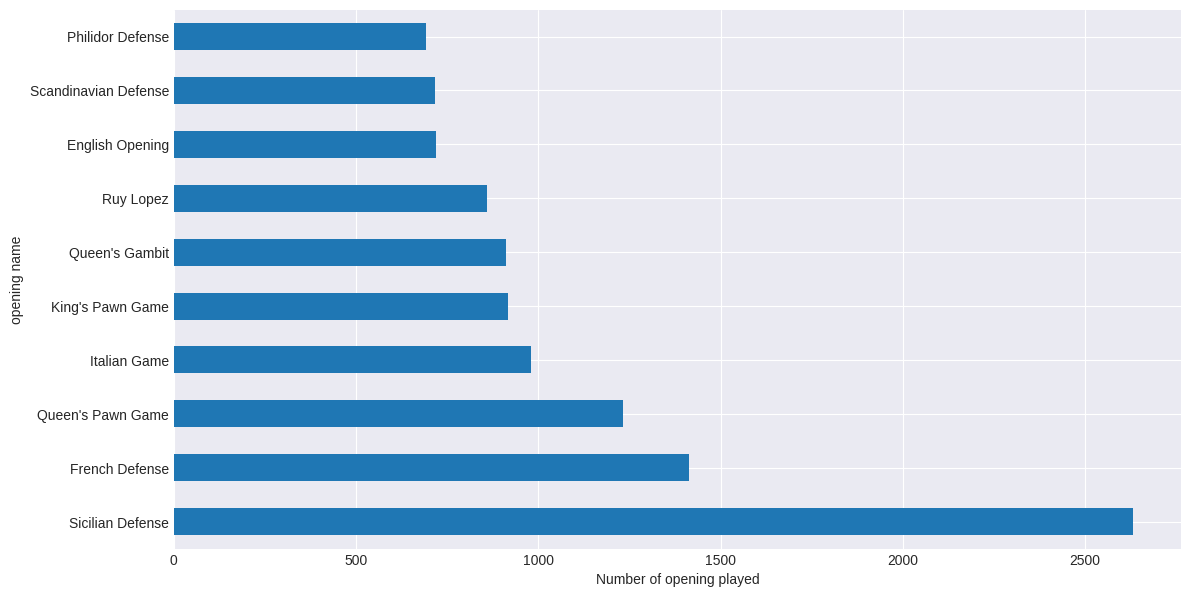

In [11]:
df_opening = df.groupby(['opening_shortname']).agg({'opening_shortname':'count'})
df_opening['opening_shortname'].sort_values(ascending = False).head(10).plot(kind='barh',figsize=(13,7))
plt.xlabel("Number of opening played")
plt.ylabel("opening name")

Text(0, 0.5, 'time format')

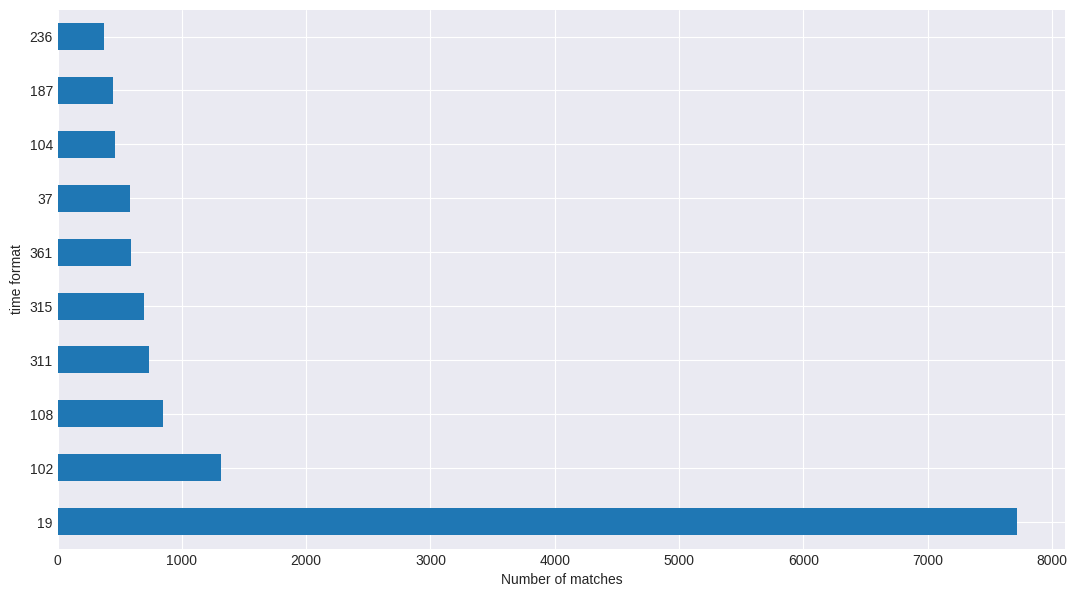

In [12]:
df_time_format = df.groupby(['time_increment'],as_index=False).agg({'time_increment':'count'})
df_time_format['time_increment'].sort_values(ascending = False).head(10).plot(kind='barh',figsize=(13,7))
plt.xlabel("Number of matches")
plt.ylabel("time format")

**Most top 10 played opening**

<Axes: ylabel='opening_shortname'>

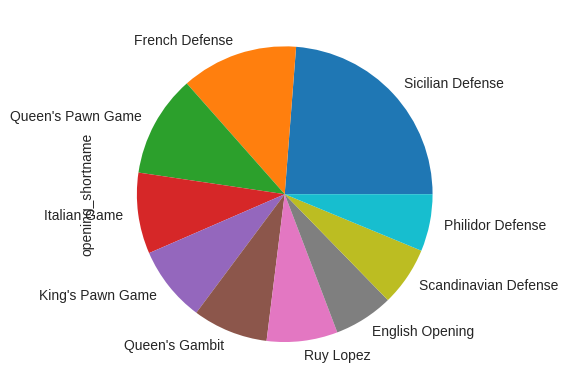

In [13]:
x1 = df_opening['opening_shortname'].sort_values(ascending=False).head(10)
x1.plot(kind='pie')

**top 20 of most played opening victory status with black and white**

<Axes: ylabel='opening_shortname,winner'>

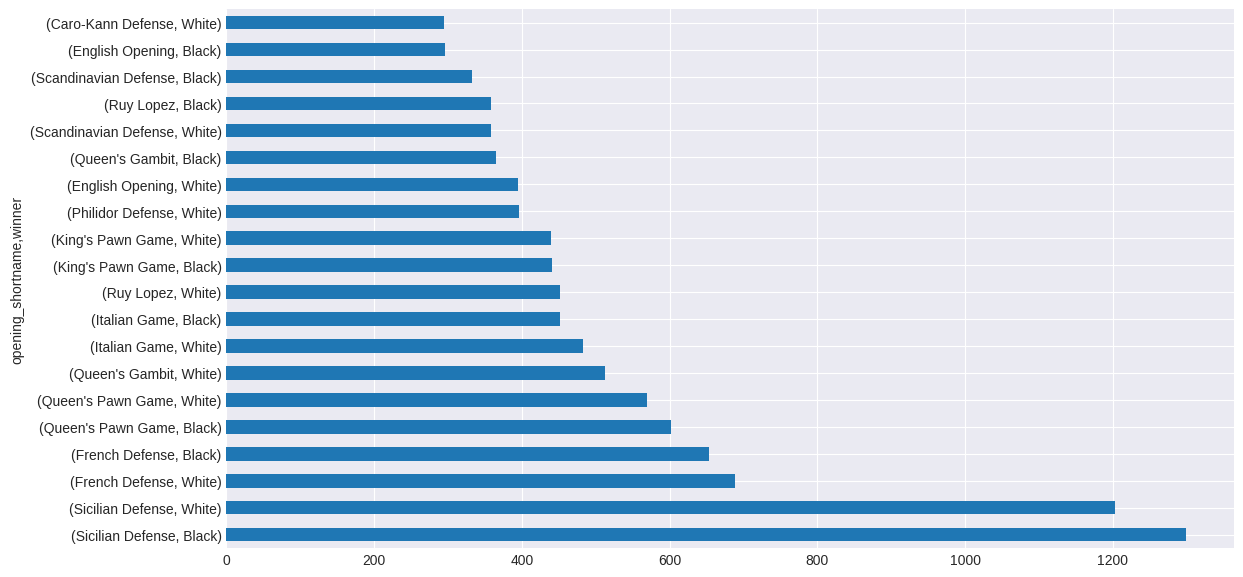

In [14]:
df_opening = df.groupby(['opening_shortname','winner'],as_index=True).agg({'opening_shortname':'count','winner':'count'})
df_opening['winner'].sort_values(ascending=False).head(20).plot(kind='barh',figsize=(13,7))

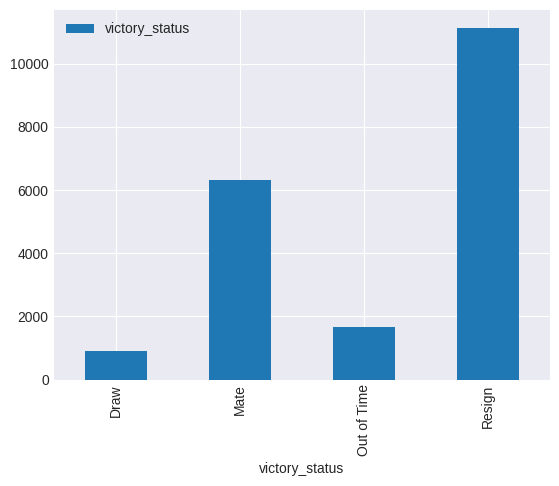

In [15]:
df_victory_status = df.groupby(['victory_status']).agg({'victory_status':'count'}).plot(kind='bar')
